In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor 
from torchvision import datasets
from torch import nn,optim
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
train_data = datasets.FashionMNIST(
    root='data',
    download=True,
    train=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    download=True,
    train=False,
    transform=ToTensor()
)


100%|█████████████████████████████████████████████████████████████████████████████| 26.4M/26.4M [00:04<00:00, 5.51MB/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 2.28MB/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████| 4.42M/4.42M [00:00<00:00, 5.36MB/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████████████████| 5.15k/5.15k [00:00<?, ?B/s]


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [11]:
train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=64)
test_loader = DataLoader(dataset=test_data, shuffle=True, batch_size=64)

for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [21]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

classes[labels[7].item()]

'Dress'

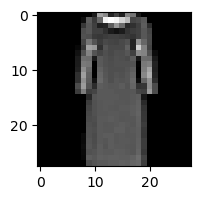

In [37]:
plt.figure(figsize=(2,2))
plt.imshow(images[7].squeeze(), cmap='gray')
plt.show()

In [51]:
class ClothesClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        return self.network(x)
    

## SGD optimizer (without momentum)

In [86]:
model = ClothesClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [87]:
epochs = 2
model.train()

for epoch in range(epochs):
    for batch, (images,labels) in enumerate(train_loader):
        pred = model(images)
        loss = loss_fn(pred, labels)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"Batch: {batch}, Loss: {loss.item():0.3f}")
        

Batch: 0, Loss: 2.312
Batch: 100, Loss: 2.288
Batch: 200, Loss: 2.277
Batch: 300, Loss: 2.261
Batch: 400, Loss: 2.261
Batch: 500, Loss: 2.255
Batch: 600, Loss: 2.254
Batch: 700, Loss: 2.238
Batch: 800, Loss: 2.238
Batch: 900, Loss: 2.234
Batch: 0, Loss: 2.202
Batch: 100, Loss: 2.193
Batch: 200, Loss: 2.204
Batch: 300, Loss: 2.176
Batch: 400, Loss: 2.155
Batch: 500, Loss: 2.129
Batch: 600, Loss: 2.118
Batch: 700, Loss: 2.108
Batch: 800, Loss: 2.076
Batch: 900, Loss: 2.042


#### SGD --> Loss: 2.042

## SGD optimizer (with momemtum)

In [83]:
model = ClothesClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [85]:
epochs = 2
model.train()

for epoch in range(epochs):
    for batch, (images,labels) in enumerate(train_loader):
        pred = model(images)
        loss = loss_fn(pred, labels)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"Batch: {batch}, Loss: {loss.item():0.3f}")
        

Batch: 0, Loss: 2.301
Batch: 100, Loss: 2.231
Batch: 200, Loss: 2.141
Batch: 300, Loss: 1.946
Batch: 400, Loss: 1.517
Batch: 500, Loss: 1.270
Batch: 600, Loss: 1.167
Batch: 700, Loss: 1.008
Batch: 800, Loss: 0.899
Batch: 900, Loss: 0.847
Batch: 0, Loss: 0.803
Batch: 100, Loss: 0.767
Batch: 200, Loss: 0.806
Batch: 300, Loss: 0.714
Batch: 400, Loss: 0.833
Batch: 500, Loss: 0.717
Batch: 600, Loss: 0.922
Batch: 700, Loss: 0.563
Batch: 800, Loss: 0.649
Batch: 900, Loss: 0.556


#### SGD with momemtum --> Loss: 0.556

## Adam optimizer

In [88]:
model = ClothesClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [89]:
epochs = 2
model.train()

for epoch in range(epochs):
    for batch, (images,labels) in enumerate(train_loader):
        pred = model(images)
        loss = loss_fn(pred, labels)

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"Batch: {batch}, Loss: {loss.item():0.3f}")
        

Batch: 0, Loss: 2.306
Batch: 100, Loss: 0.881
Batch: 200, Loss: 0.586
Batch: 300, Loss: 0.477
Batch: 400, Loss: 0.530
Batch: 500, Loss: 0.528
Batch: 600, Loss: 0.491
Batch: 700, Loss: 0.362
Batch: 800, Loss: 0.542
Batch: 900, Loss: 0.489
Batch: 0, Loss: 0.297
Batch: 100, Loss: 0.420
Batch: 200, Loss: 0.352
Batch: 300, Loss: 0.414
Batch: 400, Loss: 0.200
Batch: 500, Loss: 0.470
Batch: 600, Loss: 0.314
Batch: 700, Loss: 0.473
Batch: 800, Loss: 0.485
Batch: 900, Loss: 0.409


In [100]:
model.eval()

all_predicted = []
all_labels = []

for images, labels in test_loader:
    output = model(images)

    _, predicted = torch.max(output.data, 1)

    all_predicted.extend(predicted.numpy())
    all_labels.extend(labels.numpy())

In [104]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.76      0.75      1000
           3       0.86      0.85      0.86      1000
           4       0.72      0.82      0.77      1000
           5       0.97      0.92      0.94      1000
           6       0.64      0.62      0.63      1000
           7       0.90      0.95      0.92      1000
           8       0.93      0.97      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



#### Adam --> Loss: 0.409
#### Accuracy --> 85%